In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3 * x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5, 5, .25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

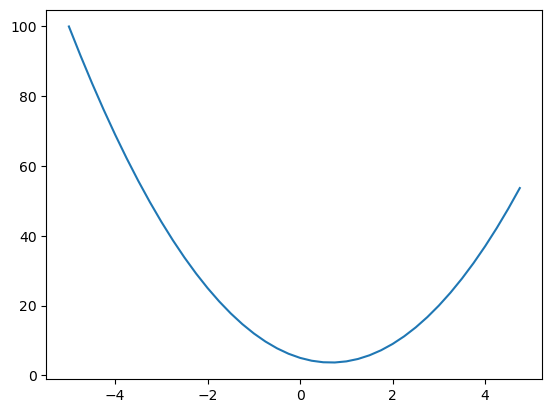

In [6]:
plt.plot(xs, ys)

In [7]:
h = 0.00000000000001
x = 3.0 
print(f(x))
print(f(x + h))
print((f(x + h) - f(x))/h)

20.0
20.000000000000142
14.210854715202004


In [8]:
x = 1.0
print((f(x + h) - f(x))/h)

1.9539925233402755


In [9]:
x = -3
print((f(x + h) - f(x))/h)

-22.737367544323206


In [10]:
x = 2/3
print((f(x + h) - f(x))/h)

0.0


In [11]:
# lets get more complex

a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)


4.0


In [12]:
h = 0.00000000000001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
d2 = (a + h) * b + c

print('d1',d1)
print('d2', d2)
print('slope', (d2-d1)/h)


d1 4.0
d2 3.99999999999997
slope -3.019806626980426


In [13]:
d1 = a * b + c
d2 = a * (b + h) + c

print('d1',d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.00000000000002
slope 2.042810365310288


In [14]:
d1 = a * b + c
d2 = a * b + (c + h)

print('d1',d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.000000000000011
slope 1.0658141036401503


In [15]:
class Value:
    def __init__(self, data, _children=(), _op='', label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    


a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = "L"
L

Value(data=-8.0)

In [16]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [17]:
d._op

'+'

In [18]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [19]:
from graphviz import Digraph
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f } " % (n.label, n.data, n.grad), shape="record")
        # and connect this node to it
        if n._op:
            dot.node(name = uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

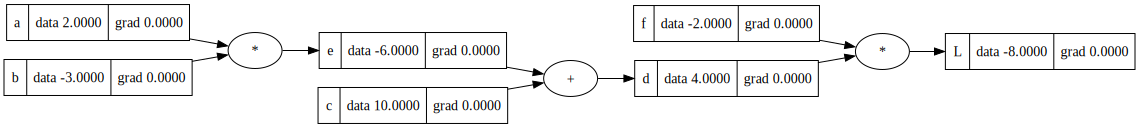

In [20]:
draw_dot(L)

In [21]:
def lol():
    h = 0.000000001


    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = "L"
    L2 = L.data + h

    print((L2 - L1)/h)
    
lol()

1.000000082740371


In [22]:
def get_grad(var):
    h = 0.000000001

    add_a = 0
    add_b = 0
    add_c = 0
    add_d = 0
    add_e = 0
    add_f = 0
    add_L = 0

    if var == 'a':
        add_a = h
    elif var == 'b':
        add_b = h
    elif var == 'c':
        add_c = h
    elif var == 'd':
        add_d = h
    elif var == 'e':
        add_e = h
    elif var == 'f':
        add_f = h
    elif var == 'L':
        add_L = h

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0 + add_a, label="a")
    b = Value(-3.0 + add_b, label="b")
    c = Value(10.0 + add_c, label="c")
    e = a * b; e.label = 'e'
    e.data += add_e
    d = e + c; d.label = 'd'
    d.data += add_d
    f = Value(-2.0, label='f')
    f.data += add_f
    L = d * f; L.label = "L"
    L.data += add_L
    L2 = L.data

    return (L2 - L1)/h

In [23]:
print(get_grad('L'))

1.000000082740371


In [24]:
L.grad = get_grad('L')
a.grad = get_grad('a')
b.grad = get_grad('b')
c.grad = get_grad('c')
d.grad = get_grad('d')
e.grad = get_grad('e')
f.grad = get_grad('f')

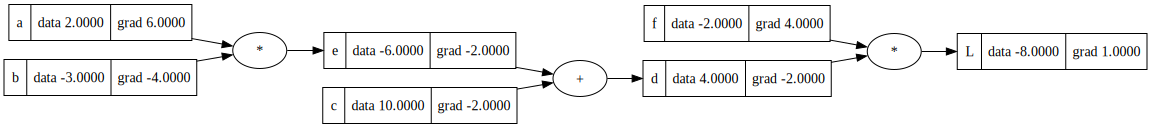

In [25]:
draw_dot(L)

### Calculation of dL/dd 

L = d * f

dL/dd = ? // f

(f(x+h)-f(x))/h

((d+h)*f - d*f)/h

(d*f + h*f - d*f)/h

(h*f)/h

f

### Calculation of dL/dc
d = c + e

dd/dc = dc/dc + de/dc

dd/dc = 1 + 0

dd/dc = 1

L = d * f

dL/dd = f

dL/dc * dc/dd = f

dL/dc * 1 = f

dL/dc = f

### Calculation of dL/da

e = a * b

de/da = b

d = c + e

dd/de = 1

L = d * f

dL/dd = f

dL/de * de/dd = f

dL/de * 1 = f

dL/de = f

dL/da * da/de = f

dL/da * 1/b = f

dL/da = f * b

dL/da = -2 * -3 = 6

### Calculation of dL/db

e = a * b

de/db = a

dL/de = f

dL/db * db/de = f

dL/db = f * a

dL/db = -2 * 2 = -4